## 学习曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

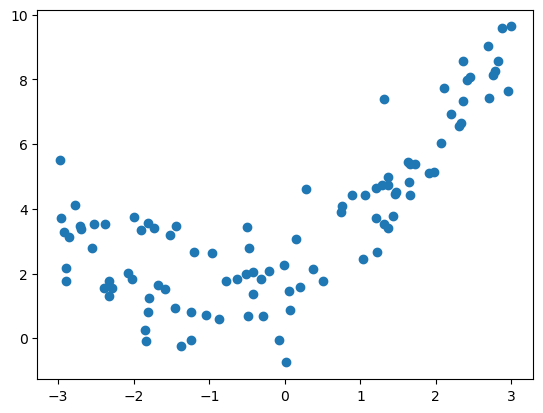

In [3]:
plt.scatter(x, y)
plt.show()

### 学习曲线

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [5]:
X_train.shape

(75, 1)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in range(1, 76): # 给1-76个数据进行训练
    lin_reg = LinearRegression() # 每一次都实例化一个LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i]) # 每一次训练的数据都取X的前i个元素
    
    y_train_predict = lin_reg.predict(X_train[:i])
    print(y_train_predict)
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    print("============================")
    y_test_predict = lin_reg.predict(X_test)
    print(y_test_predict)
    test_score.append(mean_squared_error(y_test, y_test_predict))
    print("****************************")
    print("")

[5.39578933]
[5.39578933 5.39578933 5.39578933 5.39578933 5.39578933 5.39578933
 5.39578933 5.39578933 5.39578933 5.39578933 5.39578933 5.39578933
 5.39578933 5.39578933 5.39578933 5.39578933 5.39578933 5.39578933
 5.39578933 5.39578933 5.39578933 5.39578933 5.39578933 5.39578933
 5.39578933]
****************************

[5.39578933 3.39714346]
[-12.90226264 -11.35406206   6.8341845  -18.76415749 -20.75932201
   3.41538832 -14.6223467   -4.77682827   5.02390786  -3.94798858
   1.67064307   7.36842761 -15.14158869  -9.29646827   0.68473817
  11.61622184  10.87479271  -3.21292322  -5.54047714  -2.25355697
  12.39111081  -4.26326379  -7.94746235 -14.81541898   3.13308734]
****************************

[4.86252618 3.73025854 6.74700811]
[-5.50363847 -4.62655591  5.67740206 -8.82450384 -9.95479924  3.74059457
 -6.478096   -0.9004386   4.65184886 -0.43088649  2.75216604  5.98006007
 -6.77225562 -3.46089325  2.19363377  8.38650937  7.96647688 -0.01445918
 -1.33305896  0.52903848  8.82549745 

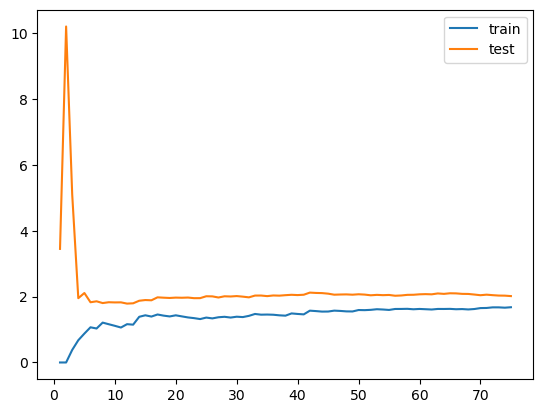

In [7]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label="test")
plt.legend()
plt.show()

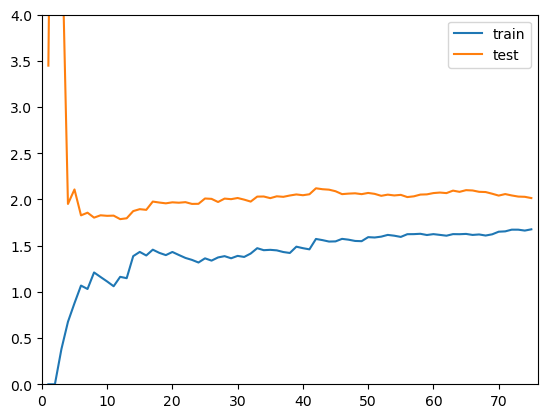

In [8]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()
    
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

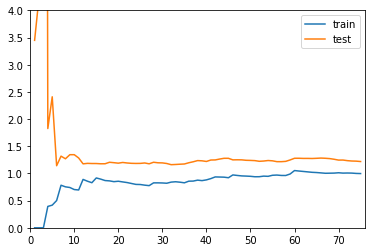

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

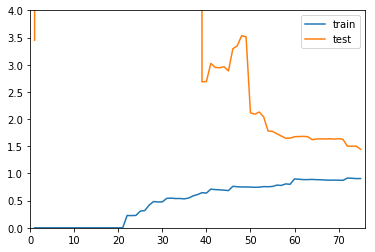

In [10]:
poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)